In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import warnings
import os
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/Datasets/credit_risk_dataset.csv")


In [3]:
df1=df.copy()

In [4]:
df1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [5]:
df1.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


#Inference
-there are missing values in person_emp_length and loan_int_rate which we can tell by looking at count
-there are some outliers in person_age feature ,as we can see max is 144


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
df1.isnull().sum() #Checking the no of null values present

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
df1.dropna(inplace=True)   #since no: of null values present are very less compared to dataset we have
                           #so drop those rows having null values

In [9]:
df1.isnull().sum()      #Null vales are removed

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [10]:
df.shape

(32581, 12)

In [11]:
df1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


#Dealing with outliers


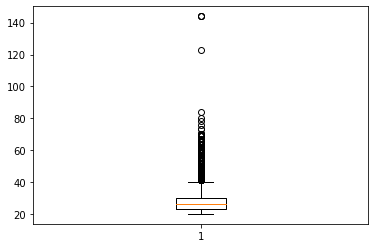

In [12]:
#Outlier detection   
plt.boxplot(df1.person_age);

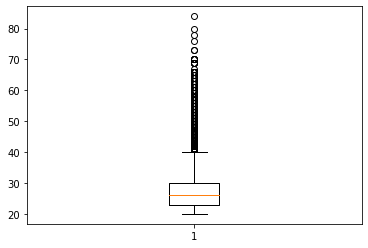

In [13]:
df1=df1[df1.person_age<=100]   
plt.boxplot(df1.person_age);

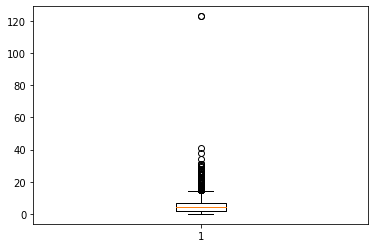

In [14]:
plt.boxplot(df1.person_emp_length);

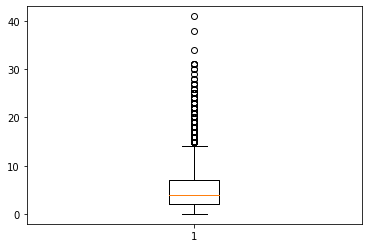

In [15]:
df1=df1[df1.person_emp_length<100]
plt.boxplot(df1.person_emp_length);

In [16]:
#Checking whether data is imbalance or not
df["loan_status"].value_counts()
#we can see that the data is imbalanced

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [17]:
# VIF for numerical columns
numeric_columns = []
for i in df1.columns:
    if df1[i].dtype != 'object' and i not in ['loan_status']:
        numeric_columns.append(i)
print(numeric_columns)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


In [18]:
# VIF sequentially check

vif_data = df1[numeric_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0

In [19]:
for i in range (0,total_columns):
    
    vif_value = variance_inflation_factor(vif_data.values, column_index)
    print (column_index,'---',vif_value)
    
    
    if vif_value <= 6:
        columns_to_be_kept.append( numeric_columns[i] )
        column_index = column_index+1
    
    else:
        vif_data = vif_data.drop([ numeric_columns[i] ] , axis=1)

0 --- 29.576420848048183
0 --- 4.254022950274872
1 --- 2.391035161721765
2 --- 8.177557257185121
2 --- 6.1158997944585805
2 --- 2.087543660909123
3 --- 2.717333740621217


In [20]:
print(columns_to_be_kept)

['person_income', 'person_emp_length', 'loan_percent_income', 'cb_person_cred_hist_length']


In [21]:
df1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [22]:
df1.describe()   #checking whether about changes r done r not.indeed it worked.

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28632.000000,2.863200e+04,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000
mean,27.712140,6.642651e+04,4.780316,9655.331447,11.039701,0.216611,0.169489,5.793553
std,6.171989,5.154746e+04,4.035616,6327.798706,3.229409,0.411942,0.106361,4.037133
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,84.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [23]:
# Checking relation between categorical  var and target var

In [24]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df1['loan_intent'],df1['cb_person_default_on_file'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 7.4033346919994365, p-value: 0.19232984235224004


In [25]:
contingency_table = pd.crosstab(df1['loan_grade'],df1['cb_person_default_on_file'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 11437.05398243658, p-value: 0.0


In [26]:
contingency_table = pd.crosstab(df1['person_home_ownership'],df1['cb_person_default_on_file'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 115.84817215739716, p-value: 6.046097569874039e-25


In [27]:
#Interpretation of above 3 cells
#since the p-value is greater than 0.05 in case of loan intent we ignore or drop that variable
#whereas in contrast loan_grade and person_home_ownership has p_value less than 0.05

In [28]:
#Dropping loan_intent variable or keeping only the necessary variables
df1=df1[['person_income', 'person_emp_length', 'loan_percent_income', 'cb_person_cred_hist_length','loan_grade','person_home_ownership','cb_person_default_on_file']]

In [29]:
df1

,person_income,person_emp_length,loan_percent_income,cb_person_cred_hist_length,loan_grade,person_home_ownership,cb_person_default_on_file
1,9600,5.0,0.10,2,B,OWN,N
2,9600,1.0,0.57,3,C,MORTGAGE,N
3,65500,4.0,0.53,2,C,RENT,N
4,54400,8.0,0.55,4,C,RENT,Y
5,9900,2.0,0.25,2,A,OWN,N
...,...,...,...,...,...,...,...
32576,53000,1.0,0.11,30,C,MORTGAGE,N
32577,120000,4.0,0.15,19,A,MORTGAGE,N
32578,76000,3.0,0.46,28,B,RENT,N
32579,150000,5.0,0.10,26,B,MORTGAGE,N


# Encoding categorical variables

In [30]:
df1= pd.get_dummies(df1, columns=['loan_grade','person_home_ownership'])

In [31]:
#Only used to encode target variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['cb_person_default_on_file']=le.fit_transform(df1['cb_person_default_on_file'])

In [32]:
df1=df1.drop(['loan_grade_F','person_home_ownership_OTHER'],axis=1)
#if not done so maylead to multicollinearity or we can say it doesnot effect our outcome

In [33]:
!pip install imbalanced-learn scikit-learn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter



In [34]:
df1

,person_income,person_emp_length,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_G,person_home_ownership_MORTGAGE,person_home_ownership_OWN,person_home_ownership_RENT
1,9600,5.0,0.10,2,0,False,True,False,False,False,False,False,True,False
2,9600,1.0,0.57,3,0,False,False,True,False,False,False,True,False,False
3,65500,4.0,0.53,2,0,False,False,True,False,False,False,False,False,True
4,54400,8.0,0.55,4,1,False,False,True,False,False,False,False,False,True
5,9900,2.0,0.25,2,0,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,53000,1.0,0.11,30,0,False,False,True,False,False,False,True,False,False
32577,120000,4.0,0.15,19,0,True,False,False,False,False,False,True,False,False
32578,76000,3.0,0.46,28,0,False,True,False,False,False,False,False,False,True
32579,150000,5.0,0.10,26,0,False,True,False,False,False,False,True,False,False


In [35]:
#Done with preprocessing part...after model fitting and evaluation
#we reiterate the preprocessing so that there is chan ce for increase in accurate prediction

In [36]:
x=df1.drop('cb_person_default_on_file',axis=1)
y=df1['cb_person_default_on_file']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [38]:
# Apply SMOTE
smote = SMOTE(random_state=1)
x_train, y_train= smote.fit_resample(x_train, y_train)

print(f"Resampled dataset shape: {Counter(y_train)}")
   

Resampled dataset shape: Counter({0: 18857, 1: 18857})


# Random Forest

In [39]:

rf_classifier = RandomForestClassifier(n_estimators = 200, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)



In [40]:
accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy}')
print ()
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)



Accuracy: 0.8304522437576393



# Decision Tree

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy}')
print ()
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)



Accuracy: 0.8191024969442989



In [43]:
!pip install xgboost

import xgboost as xgb



In [44]:
x=df1.drop('cb_person_default_on_file',axis=1)
y=df1['cb_person_default_on_file']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [45]:
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic',random_state=42)
xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)



In [46]:
accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy:.2f}')
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)



Accuracy: 0.83



# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

x=df1.drop('cb_person_default_on_file',axis=1)
y=df1['cb_person_default_on_file']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f"Accuracy: {accuracy:.2f}")
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)



Accuracy: 0.83



# Hyperparameter tuning

In [48]:
x=df1.drop('cb_person_default_on_file',axis=1)
y=df1['cb_person_default_on_file']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
xgb_classifier1 = xgb.XGBClassifier(objective='binary:logistic',random_state=42)

In [49]:
# Define the parameter grid for hyperparameter tuning

param_grid = {
    'n_estimators':[66,67,68],
    'max_depth': [2,4,3],
    'learning_rate': [0.01, 0.12,0.13,0.14,0.15],
}


In [50]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier1, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.12, 0.13, 0.14, 0.15],
                         'max_depth': [2, 4, 3], 'n_estimators': [66, 67, 68]},
             scoring='accuracy')

In [51]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'learning_rate': 0.13, 'max_depth': 3, 'n_estimators': 66}


In [52]:
# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.8255631220534311


In [53]:
#  Define the hyperparameter grid

param_grid = {
   'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
   'learning_rate'   : [0.001, 0.01, 0.1, 1],
   'max_depth'       : [3, 5, 8, 10],
   'alpha'           : [1, 10, 100],
   'n_estimators'    : [10,50,100]
 }


index = 0
   

In [54]:
answers_grid = {
     'combination'       :[],
     'train_Accuracy'    :[],
     'test_Accuracy'     :[],
     'colsample_bytree'  :[],
     'learning_rate'     :[],
     'max_depth'         :[],
     'alpha'             :[],
     'n_estimators'      :[]

     }


In [55]:
# # Loop through each combination of hyperparameters
for colsample_bytree in param_grid['colsample_bytree']:
    for learning_rate in param_grid['learning_rate']:
        for max_depth in param_grid['max_depth']:
            for alpha in param_grid['alpha']:
                for n_estimators in param_grid['n_estimators']:
                    
             
                    index = index + 1
             
                    # Define and train the XGBoost model
                    model = xgb.XGBClassifier(objective='binary:logistic',  
                                        colsample_bytree = colsample_bytree,
                                        learning_rate = learning_rate,
                                        max_depth = max_depth,
                                        alpha = alpha,
                                        n_estimators = n_estimators)
               


In [56]:
               # Define and train the XGBoost model
               model = xgb.XGBClassifier(objective='binary:logistic',  
                                        num_class=2,
                                        colsample_bytree = colsample_bytree,
                                       learning_rate = learning_rate,
                                       max_depth = max_depth,
                                        alpha = alpha,
                                        n_estimators = n_estimators)
               

In [57]:
x=df1.drop('cb_person_default_on_file',axis=1)
y=df1['cb_person_default_on_file']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
model=xgb.XGBClassifier(objective='binary:logistic',  
                                        colsample_bytree = colsample_bytree,
                                       learning_rate = learning_rate,
                                       max_depth = max_depth,
                                        alpha = alpha,
                                        n_estimators = n_estimators)
               
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)


In [59]:
# Calculate train and test results
              
train_accuracy =  accuracy_score (y_train, y_pred_train)
test_accuracy  =  accuracy_score (y_test , y_pred_test)
              


In [60]:
# Include into the lists
answers_grid ['combination'].append(index)
answers_grid ['train_Accuracy'].append(train_accuracy)
answers_grid ['test_Accuracy'].append(test_accuracy)
answers_grid ['colsample_bytree'].append(colsample_bytree)
answers_grid ['learning_rate'].append(learning_rate)
answers_grid ['max_depth'].append(max_depth)
answers_grid ['alpha'].append(alpha)
answers_grid ['n_estimators'].append(n_estimators)


In [61]:
# Print results for this combination
print(f"Combination {index}")
print(f"colsample_bytree: {colsample_bytree}, learning_rate: {learning_rate}, max_depth: {max_depth}, alpha: {alpha}, n_estimators: {n_estimators}")
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy : {test_accuracy :.2f}")
print("-" * 30)



Combination 720
colsample_bytree: 0.9, learning_rate: 1, max_depth: 10, alpha: 100, n_estimators: 100
Train Accuracy: 0.84
Test Accuracy : 0.82
------------------------------
